In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Set path
path = 'drive/MyDrive/SB_practical_notebooks/data/'

In [3]:
!pip install scipy
!pip install matplotlib
!pip install biopython

You should consider upgrading via the 'C:\Users\Alberto\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Alberto\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Alberto\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import copy
from Bio.PDB import PDBList, NeighborSearch
from Bio.PDB.PDBParser import PDBParser
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import scipy.signal

In [24]:
def get_distance_matrix(residues, seq_sep=6):

    # Calculate the distance matrix
    distances = []
    for residue1 in residues:
        if residue1.id[0] == " ":  # Exclude hetero/water residues
            row = []
            for residue2 in residues:
                if residue2.id[0] == " ":  # Exclude hetero/water residues
                    if abs(residue1.id[1] - residue2.id[1]) >= seq_sep:
                        row.append(residue1["CA"] - residue2["CA"])
                        print(residue1["CA"]-residue2["CA"])
                    else:
                        row.append(None) # For residues not respecting sequence separation
            distances.append(row)

    return np.array(distances, dtype=float)


#########################################

In [25]:
# Fetch a PDB file to the current dir
pdbl = PDBList()

# Input
pdb_id = '1ucd'

pdbl.retrieve_pdb_file(pdb_id, pdir="data\\", file_format='pdb')  # Will save to pdbXXXX.ent
structure = PDBParser(QUIET=True).get_structure(pdb_id, "data\\" + "pdb{}.ent".format(pdb_id))
selected_residues = structure[0]['A']  # select chain A of first model (0)

# Calculate the contact map using the NeighborSearch module (fast)
# https://biopython.org/docs/1.75/api/Bio.PDB.NeighborSearch.html
# ns = NeighborSearch([atom for residue in selected_residues for atom in residue.get_atoms()])
# for residue1, residue2 in ns.search_all(3.5, level="R"):  # level="R" returns pairs of residues in contact considering all atoms
#    if residue1.id[0] == " " and residue2.id[0] == " ":  # Exclude hetero/water residues
#         if abs(residue1.id[1] - residue2.id[1]) > 6:  # Sequence separation > 6
#            print(residue1.id, residue2.id)


# Usually sequence separation thresholds are: 6 (short range), 12, 24 (long range)
sequence_separation = 6

dist_matrix = get_distance_matrix(selected_residues, sequence_separation)

#########################################

Structure exists: 'data\pdb1ucd.ent' 
16.191616
19.788893
22.626295
26.314344
28.018938
31.292223
29.762096
27.570534
30.764278
32.89854
31.680313
33.090763
36.67554
38.06311
37.657436
36.37108
33.163174
32.628796
30.599037
33.880062
35.132656
32.058937
32.2268
29.079893
25.459959
23.560396
20.010233
18.929367
15.411993
12.132549
9.653674
5.868584
5.3608165
4.698399
8.000493
9.908032
9.467296
8.856429
7.280802
10.407806
12.728179
10.779678
13.397844
13.719895
16.555218
18.966017
19.351683
21.88411
23.866665
25.441856
22.265734
22.498081
26.283226
26.146807
24.184175
26.100048
28.61077
26.11009
23.957798
27.18808
27.702934
24.29068
22.644587
25.652693
25.69216
27.63054
28.696472
30.42051
31.359592
28.76882
25.957172
24.8139
24.364166
22.063845
20.026314
19.881737
18.835684
15.993868
14.862782
15.253166
13.789761
10.809953
10.851496
10.665997
7.101442
6.3758225
9.636159
8.844782
9.578588
11.0682125
13.918633
15.522854
17.90536
15.531457
13.369786
16.635212
17.904453
15.091612
16.103783
1

In [8]:
print(dist_matrix)

[[        nan         nan         nan ... 31.08472824 32.79701233
  31.71301651]
 [        nan         nan         nan ... 30.1046257  31.99383163
  30.8715992 ]
 [        nan         nan         nan ... 26.91048431 28.62224197
  27.3152523 ]
 ...
 [31.08472824 30.1046257  26.91048431 ...         nan         nan
          nan]
 [32.79701233 31.99383163 28.62224197 ...         nan         nan
          nan]
 [31.71301651 30.8715992  27.3152523  ...         nan         nan
          nan]]


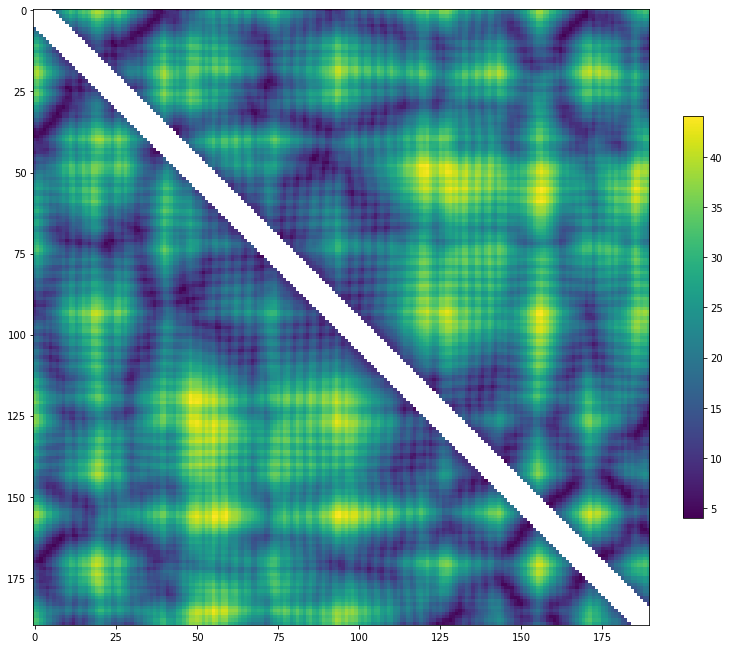

In [ ]:
# Plot distance matrix

# Alter the color map to highlight nan values (the diagonal)
current_cmap = copy.copy(matplotlib.cm.get_cmap())
current_cmap.set_bad(color='white')

fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(dist_matrix) #Useful to plot color maps
fig.colorbar(im, fraction=0.03, pad=0.05)
plt.savefig(path + 'ca_distances_{}.png'.format(pdb_id), bbox_inches='tight')

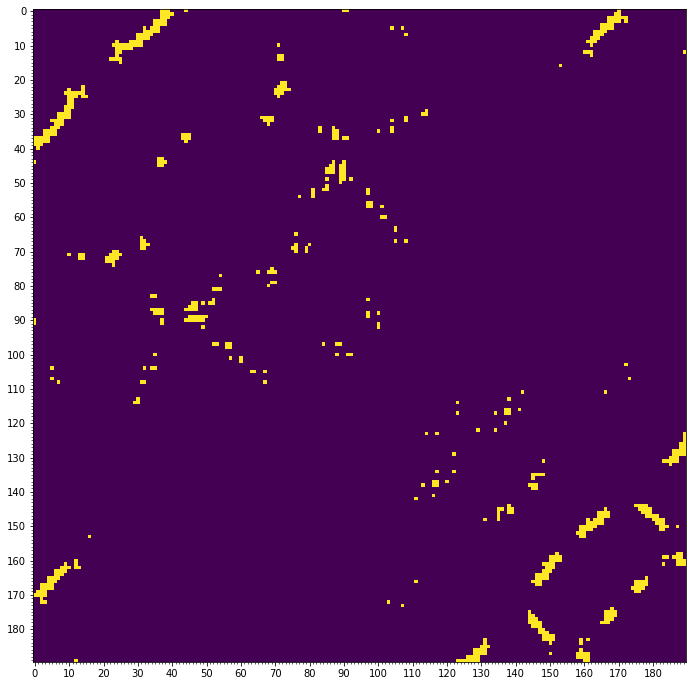

In [ ]:
# Plot contact map
contact_map = (dist_matrix[:] < 8).astype(float)  
# Calculate the contact map based on a distace threshold 8 Angstrom
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(contact_map)

# Set ticks
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

plt.savefig(path + 'ca_contacts_{}.png'.format(pdb_id), bbox_inches='tight')

Structure exists: 'drive/MyDrive/SB_practical_notebooks/data/pdb1ioo.ent' 


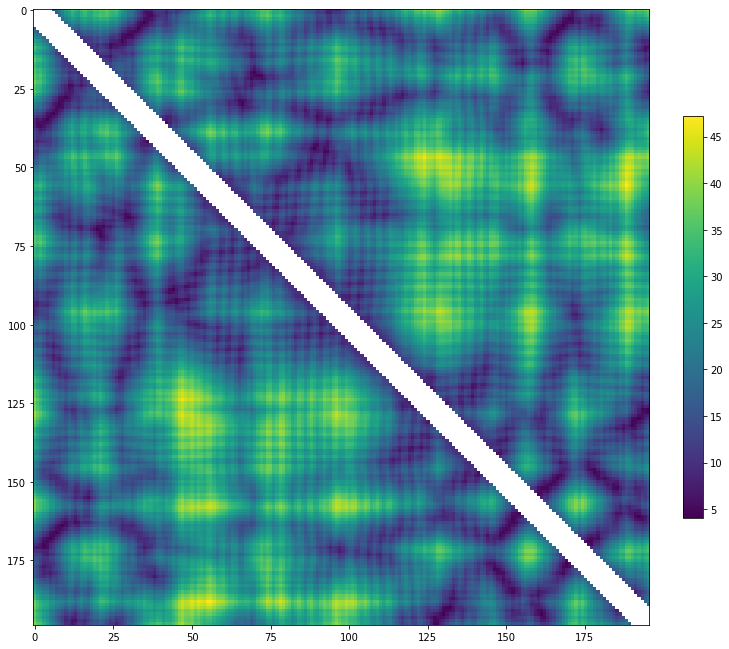

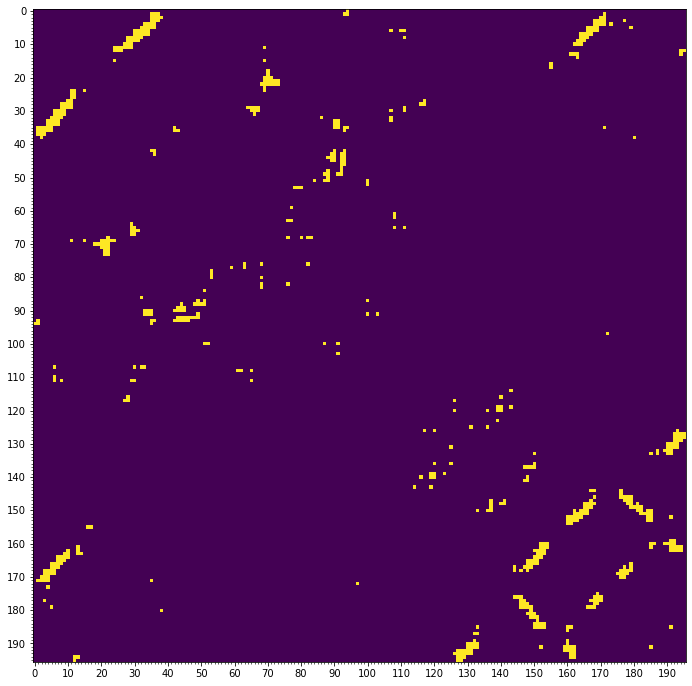

In [ ]:
# Calculate distance matrix of another PDB
# Input
pdb_id = '1ioo'
pdbl.retrieve_pdb_file(pdb_id, pdir=path, file_format='pdb')  # Will save to pdbXXXX.ent
structure = PDBParser(QUIET=True).get_structure(pdb_id, path +"pdb{}.ent".format(pdb_id))
selected_residues = structure[0]['A']  # select chain A of first model (0)
dist_matrix2 = get_distance_matrix(selected_residues, sequence_separation)

fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(dist_matrix2)
fig.colorbar(im, fraction=0.03, pad=0.05)
plt.savefig(path + 'ca_distances_{}.png'.format(pdb_id), bbox_inches='tight')

# Plot contact map
contact_map_2 = (dist_matrix2[:] < 8).astype(float)  # Calculate the contact map based on a distace threshold 8 Angstrom
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(contact_map_2)

# Set ticks
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

plt.savefig(path + 'ca_contacts_{}.png'.format(pdb_id), bbox_inches='tight')

# Set ticks
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]
2288.0
95 95


<Figure size 432x288 with 0 Axes>

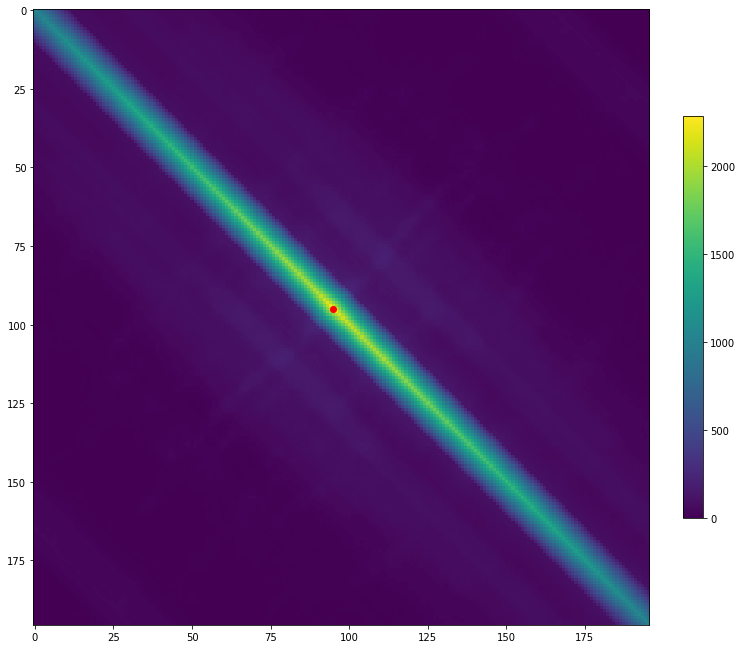

In [ ]:
# Align contact maps / distance matrices (cross-correlation)
# https://stackoverflow.com/questions/59651335/aligning-two-binary-matrices-for-maximum-overlap


# Full distance matrix
# Replace NaN in place (not necessary if sequence separation threshold is set to 0)
np.nan_to_num(dist_matrix, copy=False, nan=0.0)
np.nan_to_num(dist_matrix2, copy=False, nan=0.0)
#contact_matrix = dist_matrix
#contact_matrix2 = dist_matrix2


# Contact maps
contact_matrix = (dist_matrix[:] < 8).astype(float)  # check distance matrix has diagonals, otherwise cross correlation fail
contact_matrix2 = (dist_matrix2[:] < 8).astype(float)
print(contact_matrix)

plt.savefig(path + 'ca_contacts_{}.png'.format(pdb_id), bbox_inches='tight')


corr = scipy.signal.correlate2d(contact_matrix2, contact_matrix, mode="same")  # cross correlation
# corr = scipy.signal.convolve2d(contact_matrix2, contact_matrix)  # convolution
# print(corr)

y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find which is the maximum correlation and which is the point where the two matrices reach this value
print(corr.max())
print(x, y)

# Plot cross-correlation
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(corr)
ax.scatter([x], [y], color='red')
fig.colorbar(im, fraction=0.03, pad=0.05)
plt.savefig(path + 'ca_distances_correlation.png'.format(pdb_id), bbox_inches='tight')


233.0
87 93


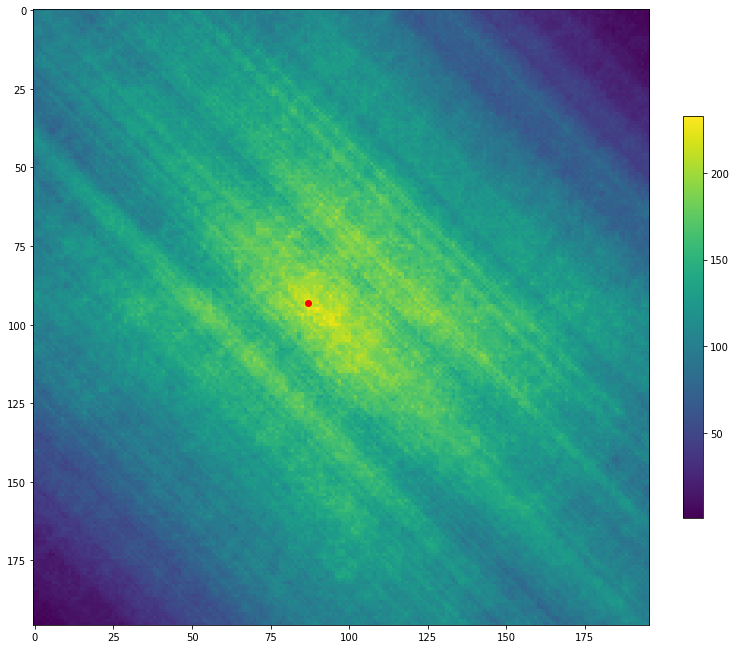

In [ ]:
#########################################
# Plot cross-correlation with one random matrix

# Randomize the first matrix
random_matrix = np.copy(contact_matrix) #first copy the contact map in a new variable
np.random.shuffle([np.random.shuffle(c) for c in random_matrix]) #shuffle the matrix

corr_random = scipy.signal.correlate2d(contact_matrix2, random_matrix, mode="same")  # cross correlation random
y, x = np.unravel_index(np.argmax(corr_random), corr_random.shape)  # find the match
print(corr_random.max())
print(x, y)

fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(corr_random)
ax.scatter([x], [y], color='red')
fig.colorbar(im, fraction=0.03, pad=0.05)
plt.savefig(path + 'ca_distances_correlation_random.png'.format(pdb_id), bbox_inches='tight')